## ETc EXPLORACION

In [1]:
# Importacion de Numpy
import numpy as np

# Importacion de Pandas
import pandas as pd

# Importacion de Matplotlib y Seaborn
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib import rcParams
import seaborn as sb

# Importacion DateTime
from datetime import datetime
from datetime import timedelta

In [2]:
def loading_etc(base_station, year, month, day):
    """
    Parametros
    ----------
    Entrada
        base_station : string
            Nombre de la estacion base del clima
        year  : int
            Año del trasplante
        month  : int
            Mes del trasplante
        dia  : int
            Dia del trasplante
    ----------
    Salida
        conagua_etc_df : dataframe
            Dataframe con registros Conagua + ETo, Kc, ETc
    """
    # Convertimos fecha de transplante a una variable de tipo datetime
    trans_day = datetime(year, month, day)
    file_ver = trans_day.strftime("%d%m%Y")

    conagua_etc_df = pd.read_csv('../output/etc/etc_'+base_station+file_ver+'.csv')
    conagua_etc_df['date'] = pd.to_datetime(conagua_etc_df['date'])

    return conagua_etc_df

In [3]:
def evapotranspiration_graph(conagua_etc_df, crop_days_stage, export_image = True):
    """
    Parametros
    ----------
    Entrada
        conagua_etc_df : dataframe
            Base de datos conagua que contiene variables clima,
            ETo, Kc, ETc, 
        crop_days_stage  : dictionary
            Dictionario con los dias para cada etapa fenologica
            de la planta
        export_image  : boolean
            True  -> guardar archivo en ../output/exploration/ [default]
            False -> se despliega grafico de los datos promediados mensualmente
    ----------
    Salida
        0 : int
    """
    # Asignacion de fecha inicial/final respecto a las etapas del cultivo
    init_start_date =  conagua_etc_df['date'][0]
    columns, rows = conagua_etc_df.shape
    end_start_date =  conagua_etc_df['date'][columns-1]
    dev_start_date = init_start_date + timedelta(days=crop_days_stage['initial'])
    mid_season_start_date = init_start_date + timedelta(days=crop_days_stage['initial']+crop_days_stage['development'])
    late_season_start_date = init_start_date + timedelta(days=crop_days_stage['initial']+crop_days_stage['development']+crop_days_stage['mid_season'])
    late_season_end_date = init_start_date + timedelta(days=crop_days_stage['initial']+crop_days_stage['development']+crop_days_stage['mid_season']+crop_days_stage['late_season'])

    # Activamos estilo de seaborn
    sb.set_style("ticks")
    
    # Grafico lineplot de seaborn, ajuste de tamano, datos en eje x,y
    fig, ax = plt.subplots(figsize = (15, 7), dpi = 200)
    lineplt = sb.lineplot(ax = ax, x='date', y='eto', color= 'aqua', label='ETo', data=conagua_etc_df)
    lineplt = sb.lineplot(ax = ax, x='date', y='kc', color= 'aqua', label='Kc', data=conagua_etc_df)
    lineplt = sb.lineplot(ax = ax, x='date', y='etc', color= 'teal', label='ETc', data=conagua_etc_df)

    # Etiquetas dentro del grafico
    lineplt.set_title('Evapotranspiracion - Etapas Cultivo')
    plt.xlabel('Tiempo Cultivo')
    plt.ylabel('ETo/ETc (mm/day)')

    # Buscamos maximo y minimo para efecto de graficacion en eje y
    max_etc = conagua_etc_df['etc'].max()
    min_etc = conagua_etc_df['etc'].min()

    # Major ticks cada decena
    fmt_decade = md.DayLocator(interval=10)
    ax.xaxis.set_major_locator(fmt_decade)

    # Minor ticks cada dia
    fmt_day = md.DayLocator(interval=1)
    ax.xaxis.set_minor_locator(fmt_day)

    # Especificamos formato de tiempo 'year-month-day'
    ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))

    # Rotar 90° la etiquetas de fecha para improvisar espacio
    plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)

    # Limites maximo y minimo de la variable sobre eje horizontal
    ax.hlines(y=max_etc, xmin=init_start_date, xmax=end_start_date, color='purple', label='lim max', linestyles='dashed')
    ax.hlines(y=min_etc, xmin=init_start_date, xmax=end_start_date, color='plum', label='lim min', linestyles='dashed')

    # Inicio/Fin de las etapas de cultivo sobre eje vertical
    ax.vlines([init_start_date], ymin = min_etc, ymax = max_etc,  label='et inicial', color='gainsboro', linestyles='dashed')
    ax.vlines([dev_start_date], ymin = min_etc, ymax = max_etc, label='et des', color='lightgray', linestyles='dashed')
    ax.vlines([mid_season_start_date], ymin = min_etc, ymax = max_etc,  label='et med', color='darkgray', linestyles='dashed')
    ax.vlines([late_season_start_date], ymin = min_etc, ymax = max_etc, label='et tard', color='gray', linestyles='dashed')
    ax.vlines([late_season_end_date], ymin = min_etc, ymax = max_etc,  color='dimgray', linestyles='dashed')
    
    # Impresion de legendas fuera de la zona de graficacion
    plt.legend(loc='best',bbox_to_anchor=(1.01, 1.0))

    # Exportar grafico como imagen
    if (export_image == True):
        # Captura del tiempo actual
        now = datetime.now()
        dt_string = now.strftime("%d%m%Y_%H%M")
        plt.savefig( fname = '../output/etc/etc_graph_'+dt_string+'.png')
    else:
        # Mostrar grafico
        plt.show()

    return 0

In [4]:
def rain_graph(conagua_etc_df, crop_days_stage, export_image = True):
    """
    Parametros
    ----------
    Entrada
        conagua_etc_df : dataframe
            Base de datos conagua que contiene variables clima,
            ETo, Kc, ETc, 
        crop_days_stage  : dictionary
            Dictionario con los dias para cada etapa fenologica
            de la planta
        export_image  : boolean
            True  -> guardar archivo en ../output/exploration/ [default]
            False -> se despliega grafico de los datos promediados mensualmente
    ----------
    Salida
        0 : int
    """
    # Asignacion de fecha inicial/final respecto a las etapas del cultivo
    init_start_date =  conagua_etc_df['date'][0]
    columns, rows = conagua_etc_df.shape
    end_start_date =  conagua_etc_df['date'][columns-1]
    dev_start_date = init_start_date + timedelta(days=crop_days_stage['initial'])
    mid_season_start_date = init_start_date + timedelta(days=crop_days_stage['initial']+crop_days_stage['development'])
    late_season_start_date = init_start_date + timedelta(days=crop_days_stage['initial']+crop_days_stage['development']+crop_days_stage['mid_season'])
    late_season_end_date = init_start_date + timedelta(days=crop_days_stage['initial']+crop_days_stage['development']+crop_days_stage['mid_season']+crop_days_stage['late_season'])

    # Activamos estilo de seaborn
    sb.set_style("ticks")
    
    # Grafico lineplot de seaborn, ajuste de tamano, datos en eje x,y
    fig, ax = plt.subplots(figsize = (15, 7), dpi = 200)
    lineplt = sb.lineplot(ax = ax, x='date', y='rain_mm', color= 'teal', label='rain', data=conagua_etc_df)

    # Etiquetas dentro del grafico
    lineplt.set_title('Lluvia - Etapas Cultivo')
    plt.xlabel('Tiempo Cultivo')
    plt.ylabel('LLuvia (mm/day)')

    # Buscamos maximo y minimo para efecto de graficacion en eje y
    max_etc = conagua_etc_df['rain_mm'].max()
    min_etc = conagua_etc_df['rain_mm'].min()

    # Major ticks cada decena
    fmt_decade = md.DayLocator(interval=10)
    ax.xaxis.set_major_locator(fmt_decade)
    print(fmt_decade)

    # Minor ticks cada dia
    fmt_day = md.DayLocator(interval=1)
    ax.xaxis.set_minor_locator(fmt_day)

    # Especificamos formato de tiempo 'year-month-day'
    ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))

    # Rotar 90° la etiquetas de fecha para improvisar espacio
    plt.setp(ax.xaxis.get_majorticklabels(), rotation = 45)

    # Limites maximo y minimo de la variable sobre eje horizontal
    ax.hlines(y=max_etc, xmin=init_start_date, xmax=end_start_date, color='purple', label='lim max', linestyles='dashed')
    ax.hlines(y=min_etc, xmin=init_start_date, xmax=end_start_date, color='plum', label='lim min', linestyles='dashed')

    # Inicio/Fin de las etapas de cultivo sobre eje vertical
    ax.vlines([init_start_date], ymin = min_etc, ymax = max_etc,  label='et inicial', color='gainsboro', linestyles='dashed')
    ax.vlines([dev_start_date], ymin = min_etc, ymax = max_etc, label='et des', color='lightgray', linestyles='dashed')
    ax.vlines([mid_season_start_date], ymin = min_etc, ymax = max_etc,  label='et med', color='darkgray', linestyles='dashed')
    ax.vlines([late_season_start_date], ymin = min_etc, ymax = max_etc, label='et tard', color='gray', linestyles='dashed')
    ax.vlines([late_season_end_date], ymin = min_etc, ymax = max_etc,  color='dimgray', linestyles='dashed')
    
    # Impresion de legendas fuera de la zona de graficacion
    plt.legend(loc='best',bbox_to_anchor=(1.01, 1.0))

    # Exportar grafico como imagen
    if (export_image == True):
        # Captura del tiempo actual
        now = datetime.now()
        dt_string = now.strftime("%d%m%Y_%H%M")
        plt.savefig( fname = '../output/etc/rain_graph_'+dt_string+'.png')
    else:
        # Mostrar grafico
        plt.show()

    return 0

In [5]:
def crop_water_need_growing_season(conagua_etc_df, crop_days_stage):
    """
    Parametros
    ----------
    Entrada
        conagua_etc_df : dataframe
            Base de datos conagua que contiene variables clima,
            ETo, Kc, ETc, 
        crop_days_stage  : dictionary
            Dictionario con los dias para cada etapa fenologica
            de la planta
    ----------
    Salida
        0 : int
    """
    # Asignacion de fecha inicial/final respecto a las etapas del cultivo
    init_start_date =  conagua_etc_df['date'][0]
    columns, rows = conagua_etc_df.shape
    end_start_date =  conagua_etc_df['date'][columns-1]
    dev_start_date = init_start_date + timedelta(days=crop_days_stage['initial'])
    mid_season_start_date = init_start_date + timedelta(days=crop_days_stage['initial']+crop_days_stage['development'])
    late_season_start_date = init_start_date + timedelta(days=crop_days_stage['initial']+crop_days_stage['development']+crop_days_stage['mid_season'])
    late_season_end_date = init_start_date + timedelta(days=crop_days_stage['initial']+crop_days_stage['development']+crop_days_stage['mid_season']+crop_days_stage['late_season'])

    display(conagua_etc_df)
    



0

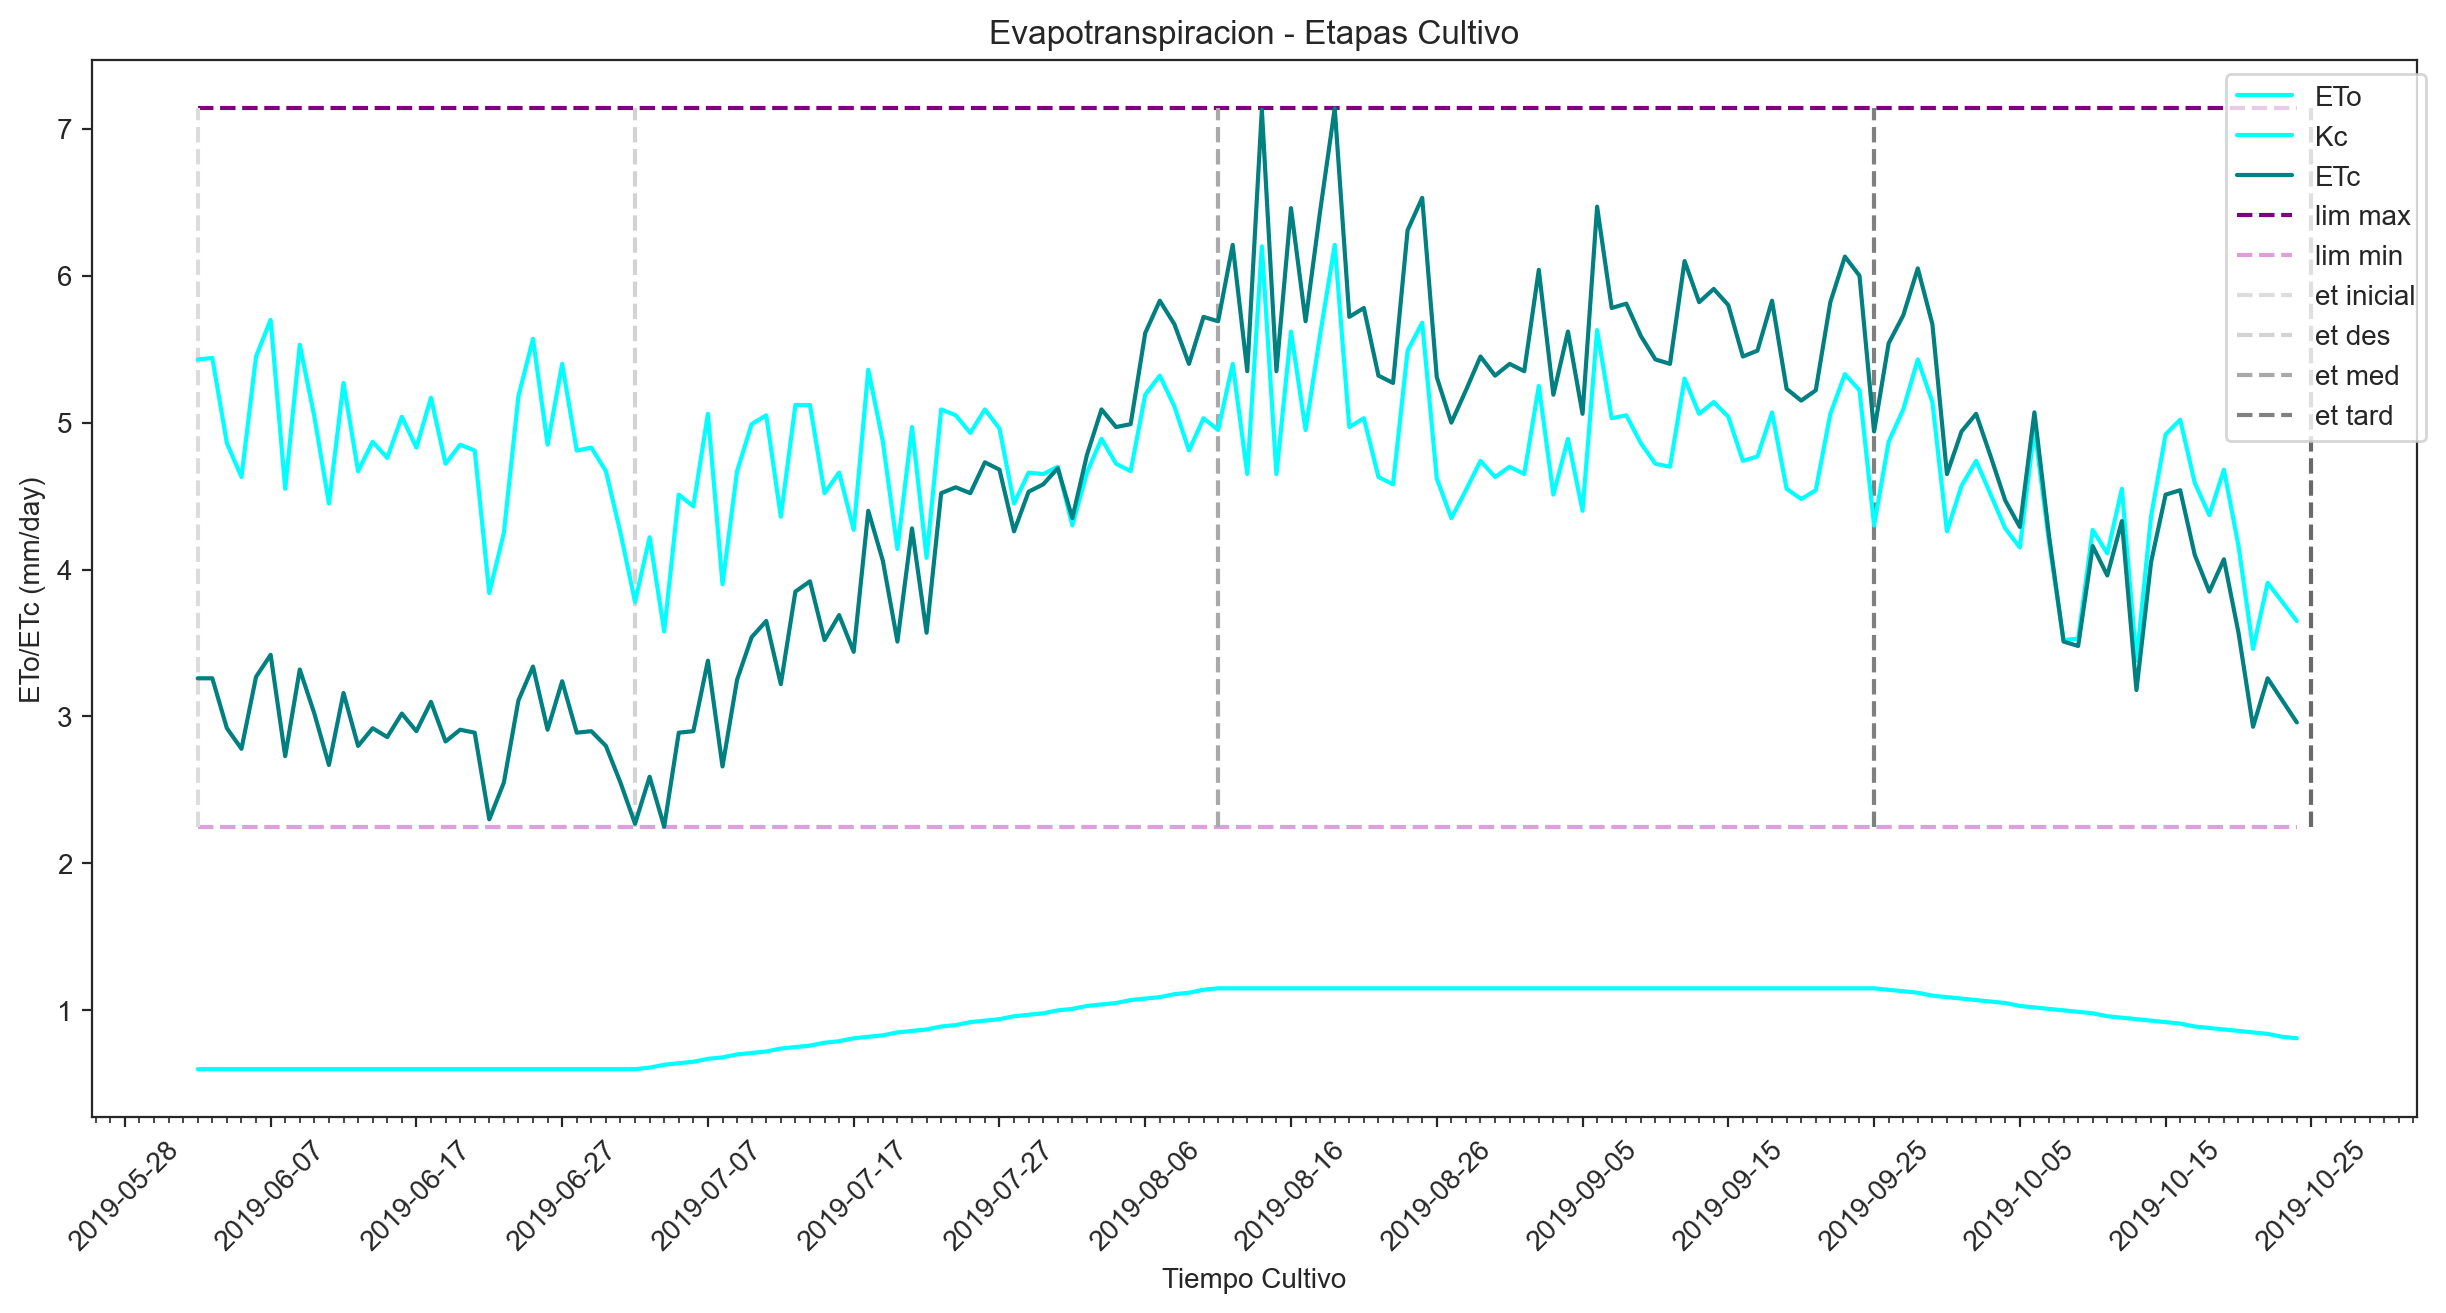

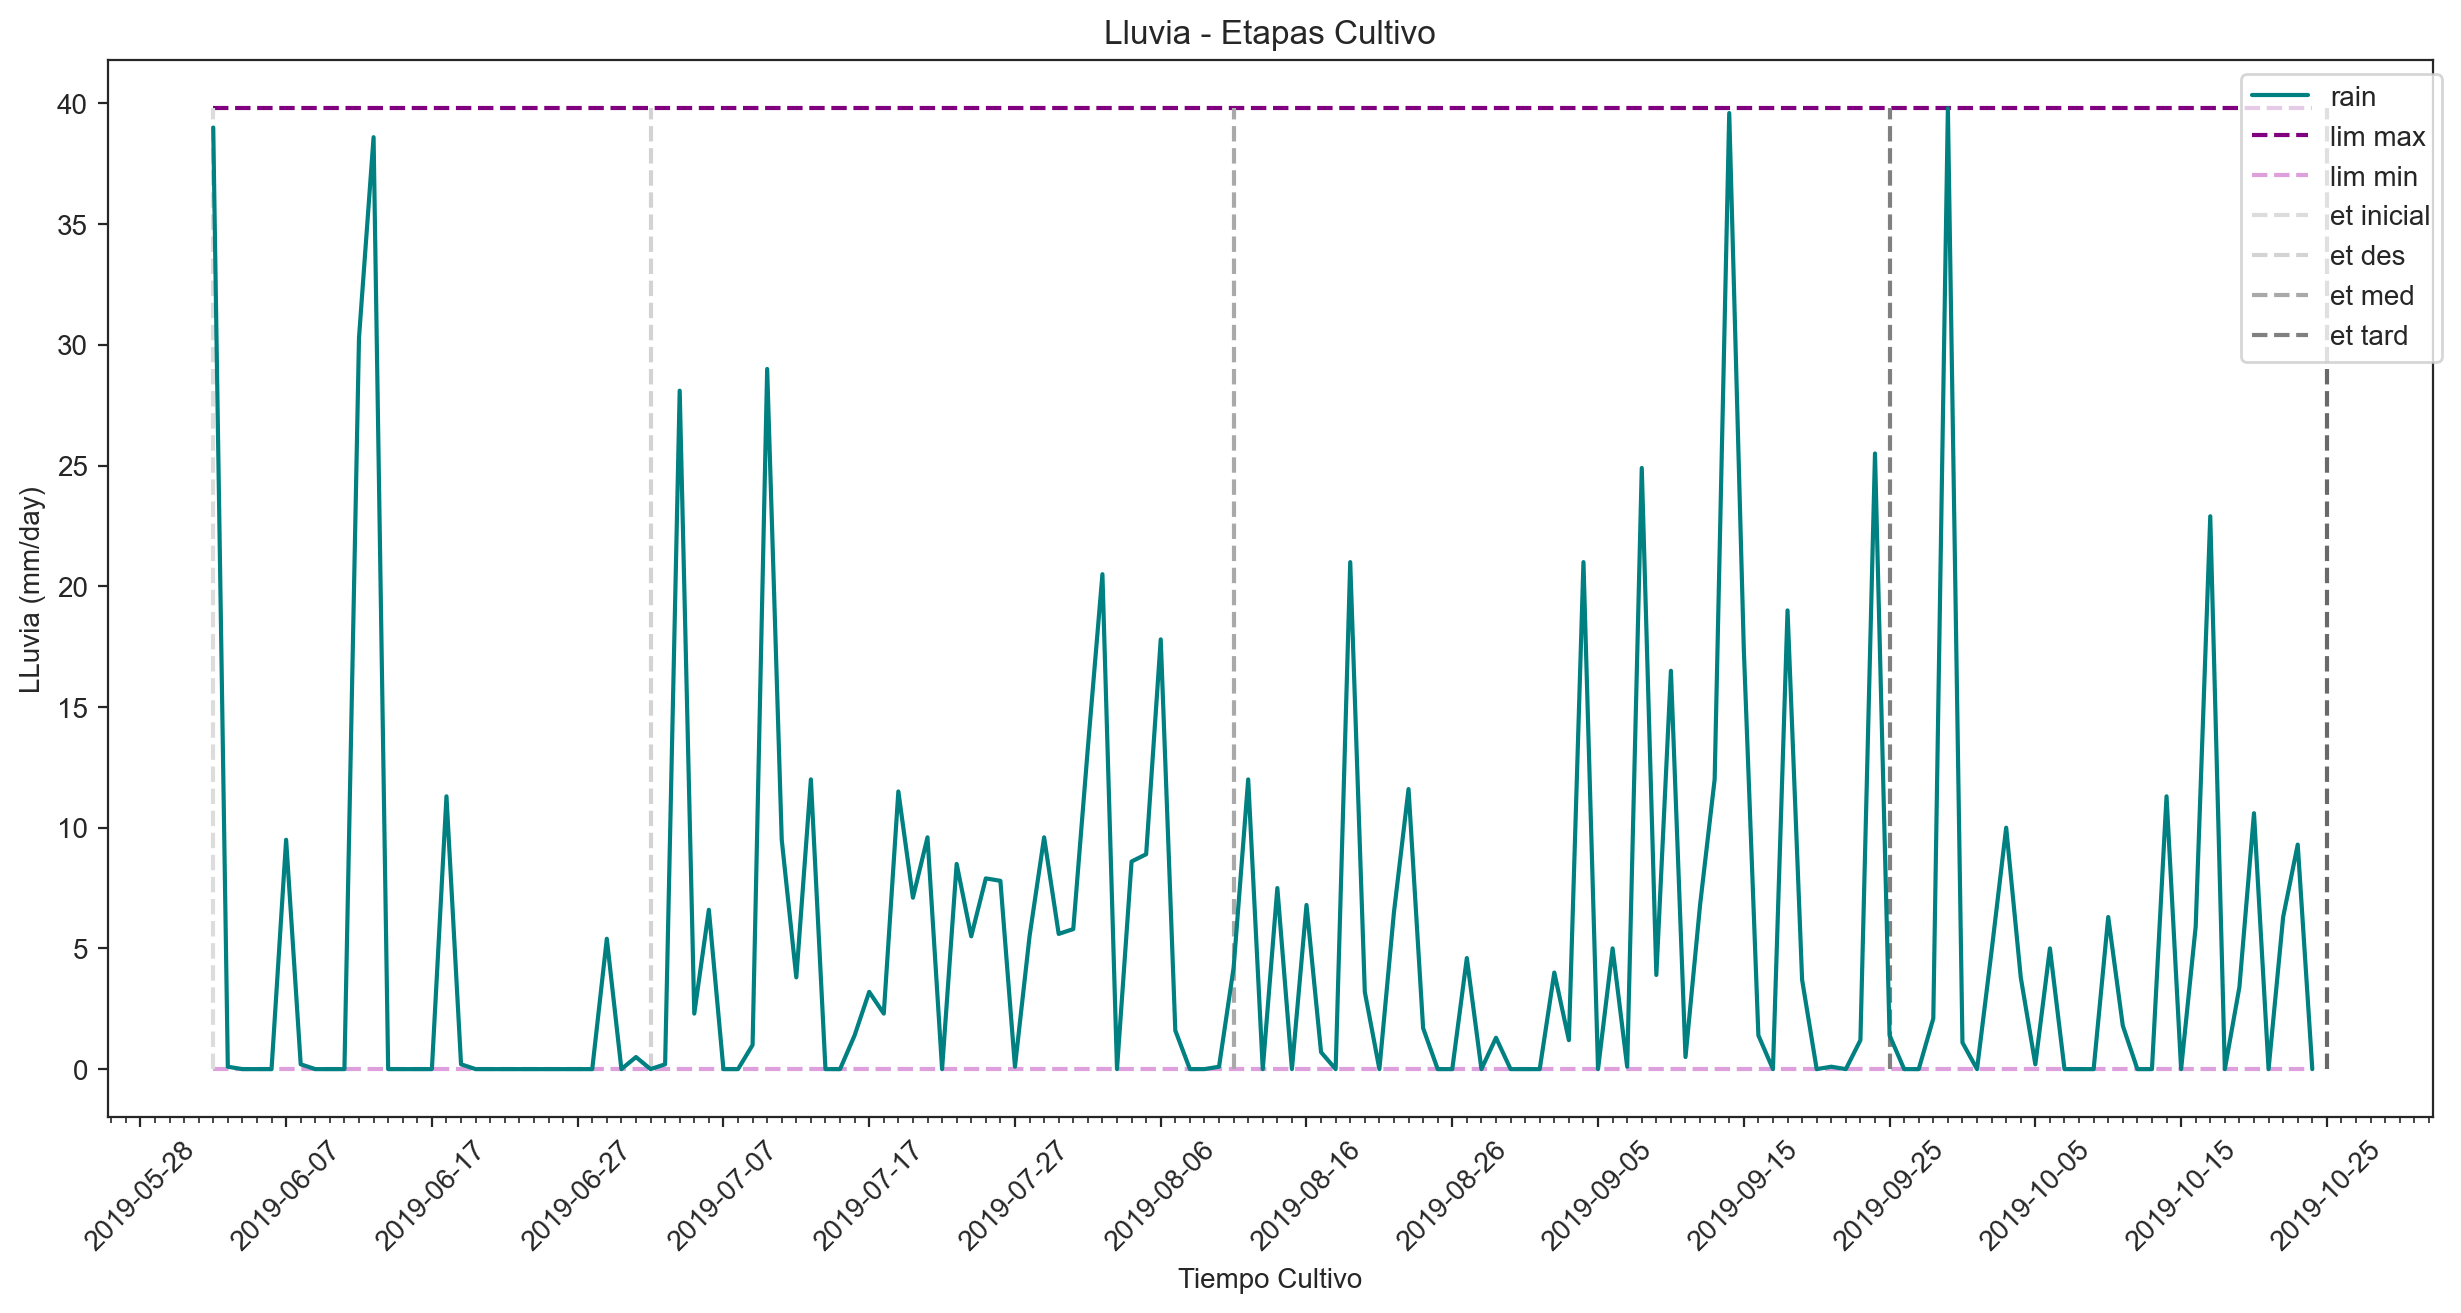

In [6]:
base_station = 'cdguzman'

# http://www.fao.org/land-water/databases-and-software/crop-information/tomato/en/
# Definimos las etapas del cultivo de tomate
tomato_days_stage= {
                    "initial":      30,
                    "development":  40,
                    "mid_season":   45,
                    "late_season":  30
}


conagua_etc_df = loading_etc(base_station, 2019, 6, 1)
evapotranspiration_graph(conagua_etc_df, tomato_days_stage, True)
rain_graph(conagua_etc_df, tomato_days_stage, True)

# conagua_etc_df = loading_etc(base_station, 2020, 5, 1)
# evapotranspiration_graph(conagua_etc_df, tomato_days_stage, False)
# rain_graph(conagua_etc_df, tomato_days_stage, False)